# Ultimate Challenge
The work for the problems will precede the answers to each question. The dataset will be deleted following submission.

##

## Work for Part 1

In [949]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('fivethirtyeight')

In [950]:
# First thing I will do is put the data into 15 minute increments and count the number of times the logins fall within those intervals. 

In [951]:
logins = pd.read_json('logins.json')
logins['count'] = 1

In [952]:
logins = logins.resample('15Min', on='login_time').sum()

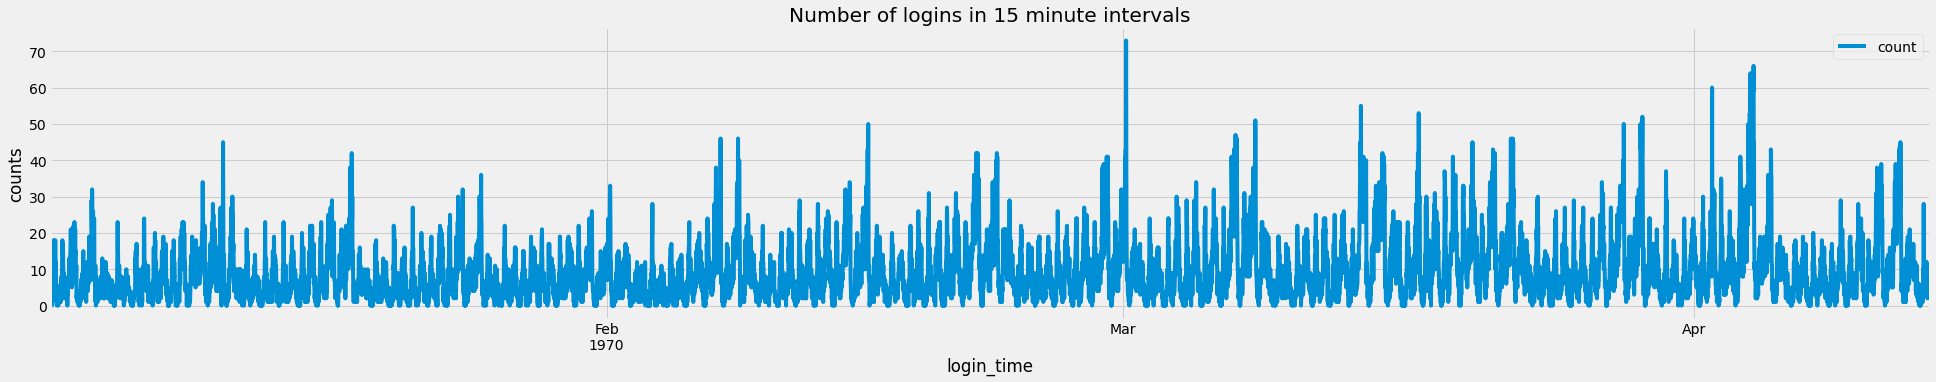

In [953]:
# Visualize the resutls

logins.plot( figsize=(30,5))
plt.title('Number of logins in 15 minute intervals')
plt.ylabel('counts')
plt.show()

There looks to be some type of seasonality. We will group the data by various intervals and explore relationships within them.

In [954]:
# Let's look at varioius distributions of the data

login_hourly = logins.groupby(pd.Grouper(freq='H')).sum()
login_daily = logins.groupby(pd.Grouper(freq='D')).sum()
login_weekly = logins.groupby(pd.Grouper(freq='W')).sum()
login_monthly = logins.groupby(pd.Grouper(freq='M')).sum()

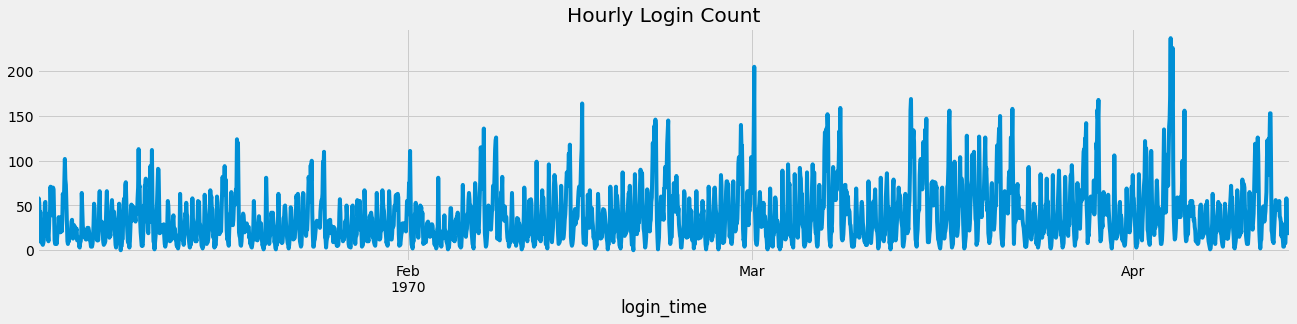

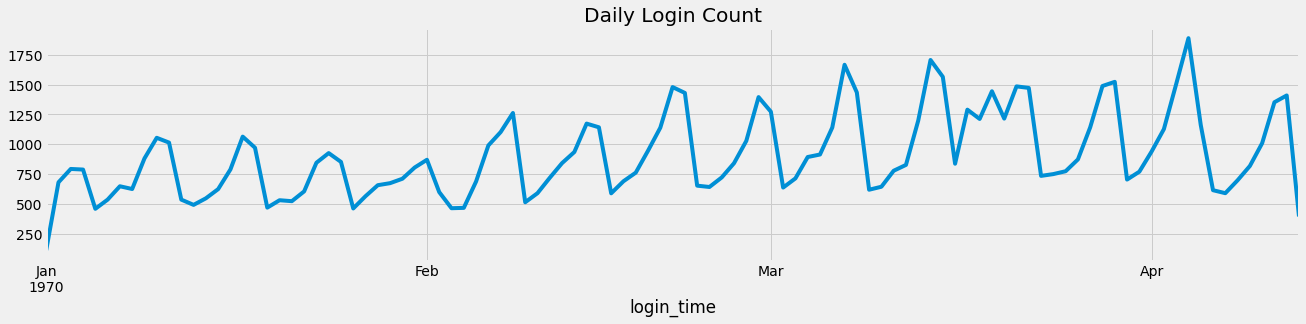

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


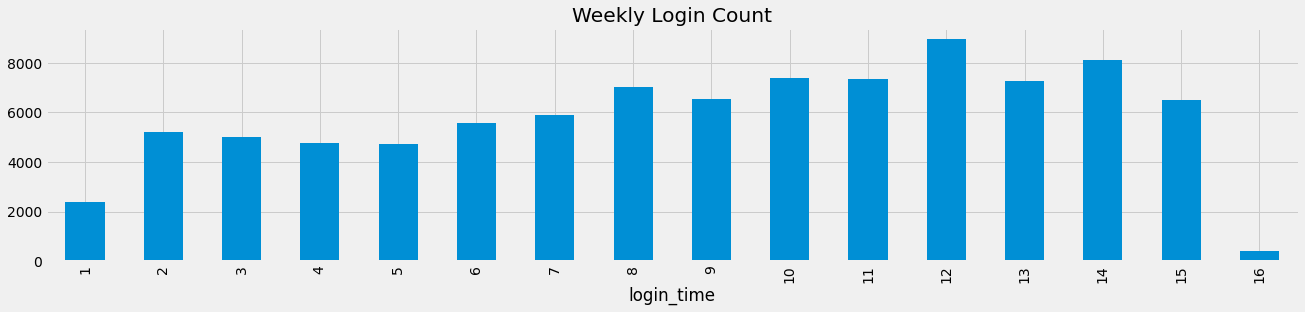

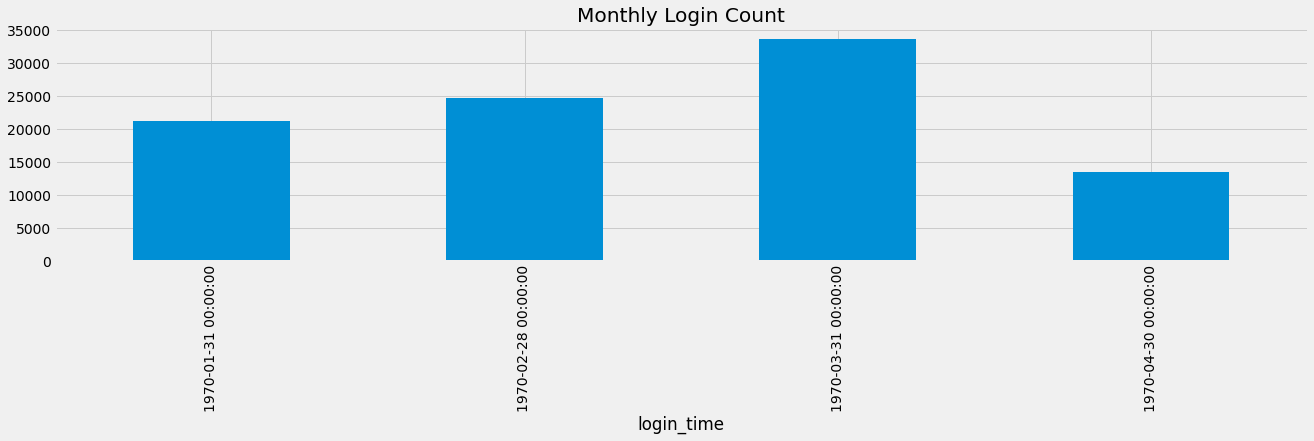

In [955]:
login_hourly['count'].plot(figsize=(20,4))
plt.title('Hourly Login Count')
plt.show()
login_daily['count'].plot(figsize=(20,4))
plt.title('Daily Login Count')
plt.show()
login_weekly.set_index(login_weekly.index.week)['count'].plot(figsize=(20,4), kind='bar')
plt.title('Weekly Login Count')
plt.show()
login_monthly['count'].plot(figsize=(20,4), kind='bar')
plt.title('Monthly Login Count')
plt.show()

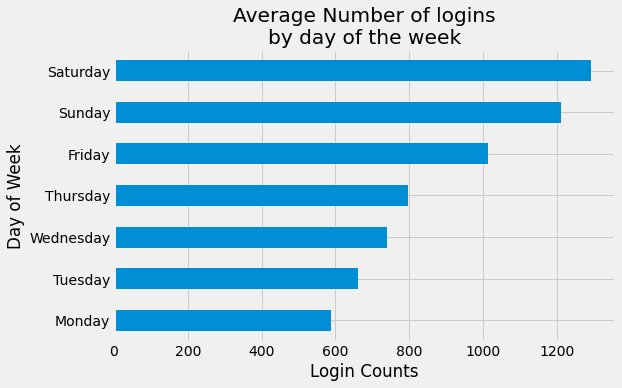

In [956]:
dow_ind = login_daily.index.day_name()
login_daily['dow'] = dow_ind

login_daily.groupby('dow')['count'].mean().sort_values().plot(kind='barh')
plt.title('Average Number of logins\nby day of the week')
plt.ylabel('Day of Week')
plt.xlabel('Login Counts')
plt.show()

# Daily Cycles

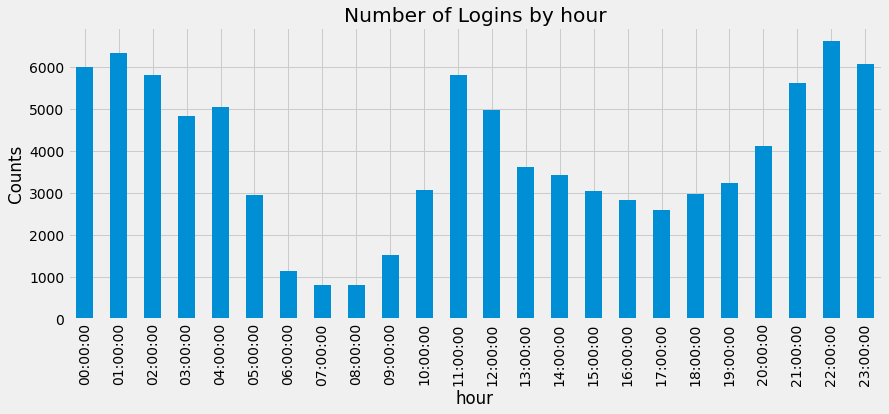

In [957]:
login_hourly['hour'] = login_hourly.index.time

plt.figure(figsize=(13,5))
login_hourly.groupby('hour')['count'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Number of Logins by hour')
plt.ylabel('Counts')
plt.show()

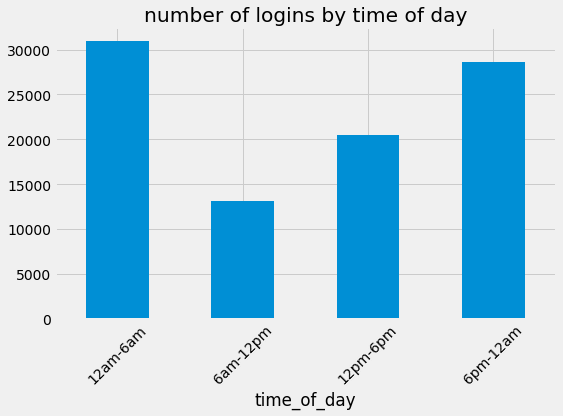

In [958]:
login_hourly['time_of_day'] = pd.cut(np.array(login_hourly.index.hour), bins=4, labels=['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am'])
login_hourly.groupby('time_of_day')['count'].sum().plot(kind='bar')
plt.xticks(rotation=45)

plt.title('number of logins by time of day')
plt.show()

From the barchart, we can see that logins are highest between 10-11 pm (23:00:00) and lowest between 7-8 am. There is a daily trend whereby the number of logins are concave during the morning (between `[5 to 10)` am . Are convex during lunch, `[10 to 13)` concave during work hours `[13 to 20)` and has three local maxima from `[20 to 5)` during the night hours)

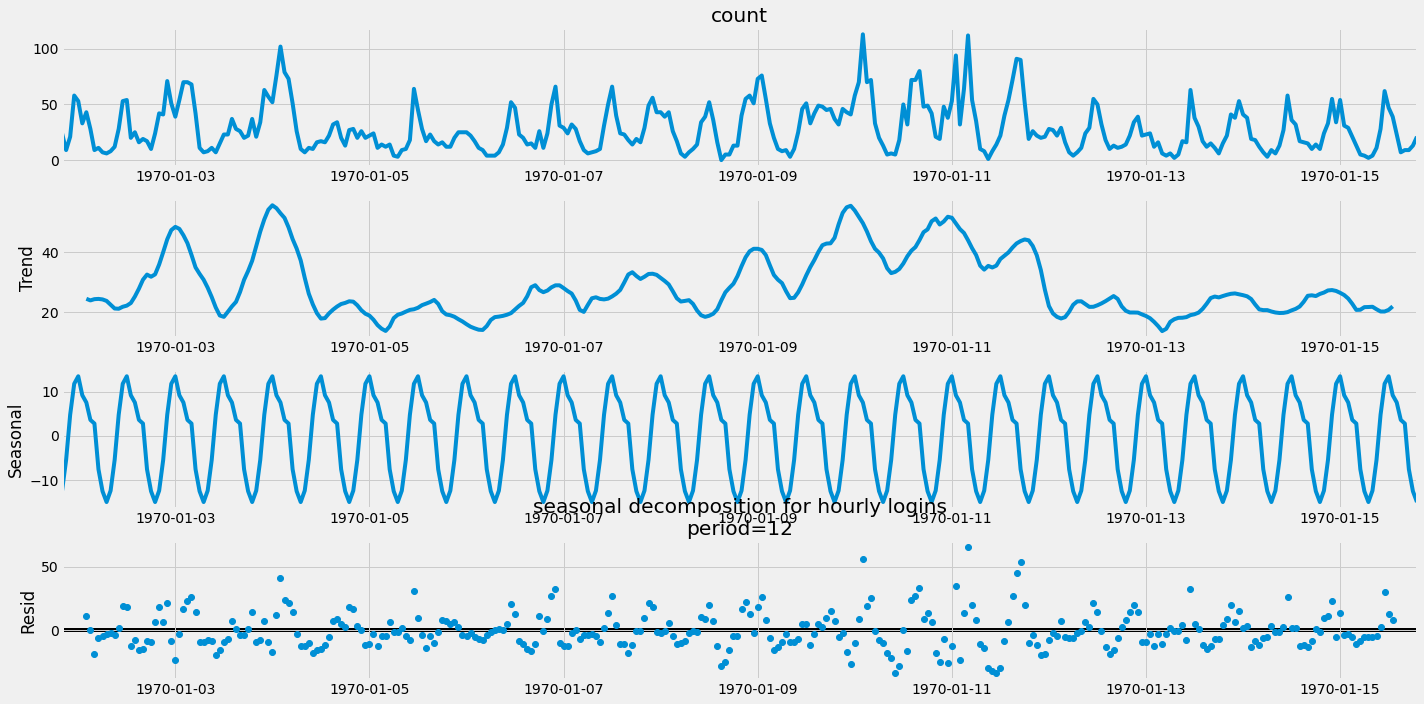

In [959]:
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose

matplotlib.rcParams['figure.figsize'] = [20, 10]

decomposition = seasonal_decompose(login_hourly['count'][:336], model='additive', period=12)
fig = decomposition.plot()

plt.title('seasonal decomposition for hourly logins\nperiod=12')
matplotlib.rcParams['figure.figsize'] = [8, 5]


# Weekly Cycles Shows upward trend

In [960]:
# This shows that the data has weekly seasonality with an upward trend

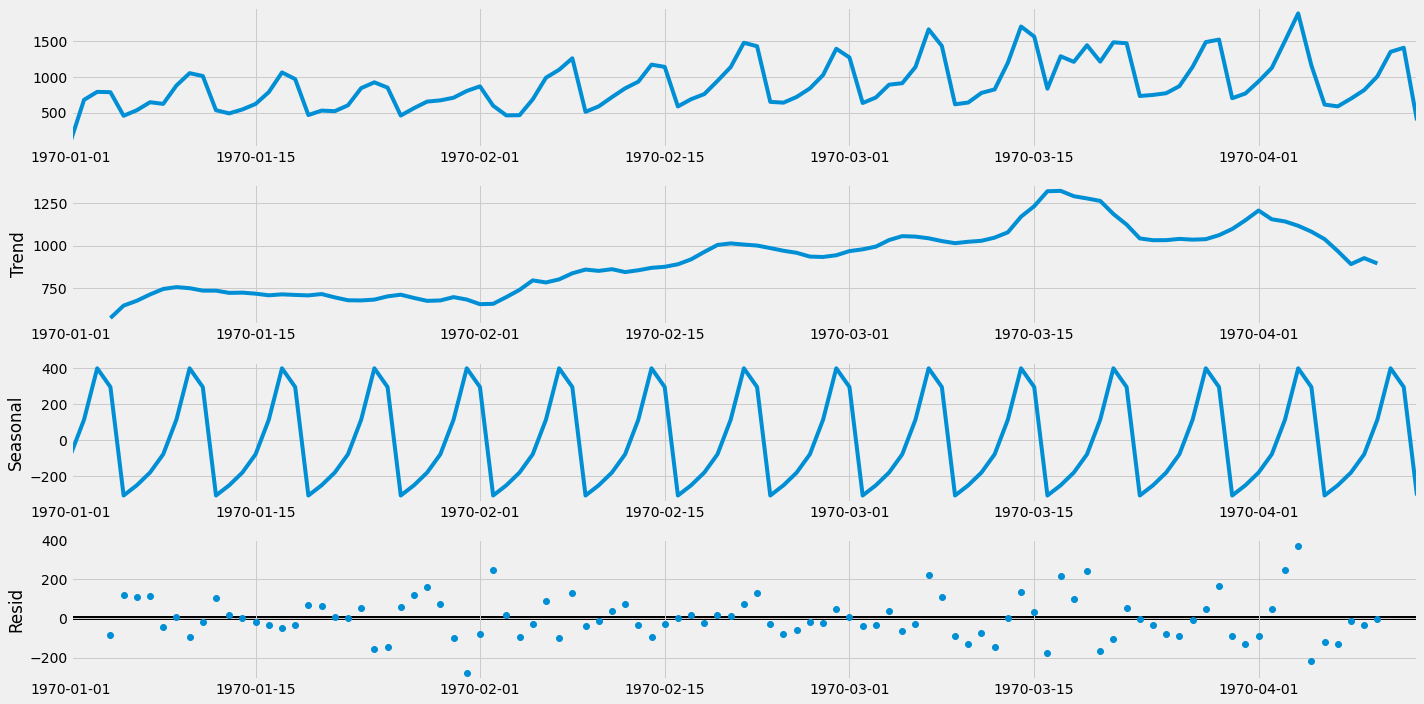

In [961]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
decomposition = seasonal_decompose(login_daily.drop('dow', axis=1), model='additive', period=7)
fig = decomposition.plot()

matplotlib.rcParams['figure.figsize'] = [8, 5]

# weekly seasonality with an upward trend 

We can see the data is following seasonality.

p value for stationarity (random walk): 0.5806851218557985


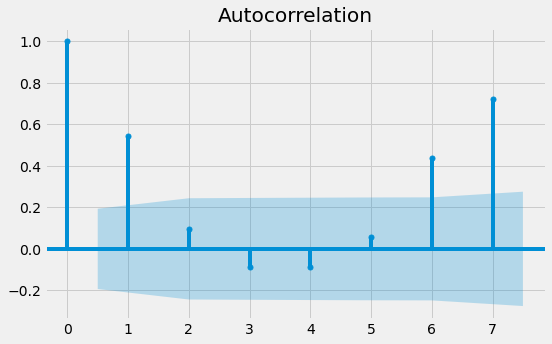

In [962]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(login_daily['count'], lags=7, alpha=0.05)
results = adfuller(login_daily['count'])
print('p value for stationarity (random walk): {}'.format(results[1]))

# Autocorrelation shows strong autocorrelations at lags 1,6,7,8, 13, 14 ... Weekly

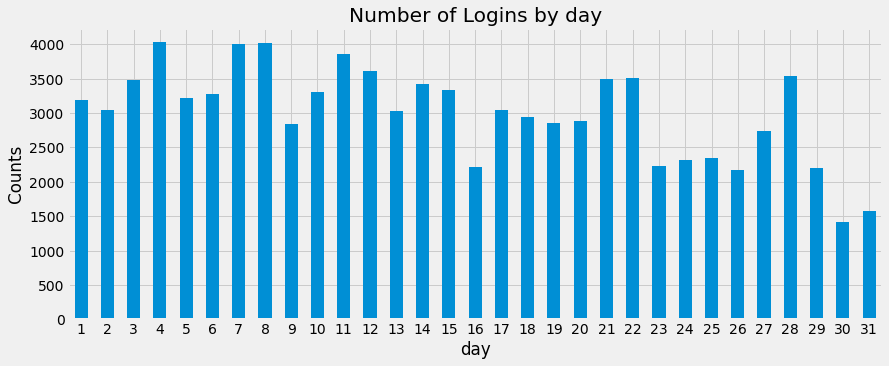

In [963]:
login_daily['day'] = login_daily.index.day

plt.figure(figsize=(13,5))
login_daily.groupby('day')['count'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of Logins by day')
plt.ylabel('Counts')
plt.show()

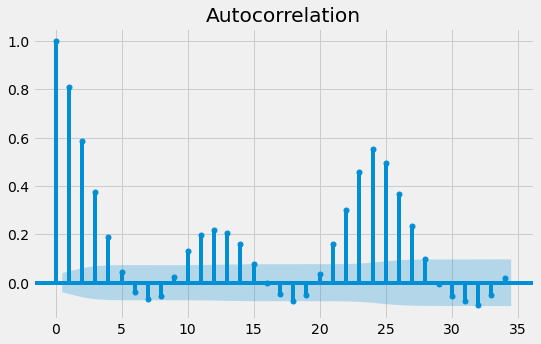

In [964]:
#from statsmodels.graphics.tsaplots import plot_acf

plot_acf(login_hourly['count'])
plt.show()

# Shows strong lag at 1,2,3,4, 10, 11, 12, 24

# Part 1 - Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


## Answers to Question 1:
- The data shows seasonality in weekly intervals as shown in the plots below.  
- It also shows that logins on weekends and fridays are higher than other days, with monday being the lowest.  
- There is a daily seasonality as well, with peak login times happening between the hours of 6pm and 6am, and lowest during the morning hours (12 hour frequency)   
- There is also a general upward trend in the logins, showing that the number of logins is increasing over time.  

logins are highest between 10-11 pm (23:00:00) and lowest between 7-8 am. There is a daily trend whereby the number of logins are concave during the morning (between `[5 to 10)` am . Are convex during lunch, `[10 to 13)` concave during work hours `[13 to 20)` and has three local maxima from `[20 to 5)` during the night hours)
Hourly autocorrelation shows periodicity every 12 hours, with max at 24. Weekly shows periodicty every 7 days.

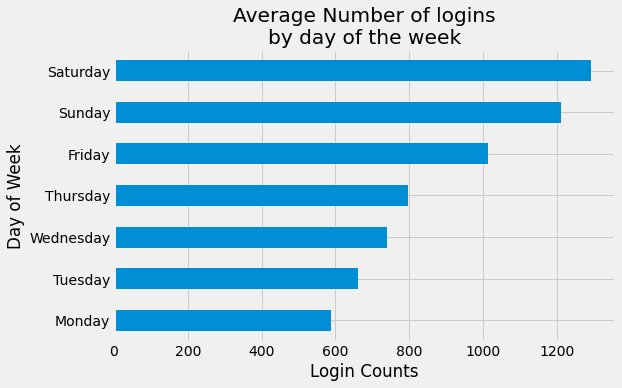

In [965]:
login_daily.groupby('dow')['count'].mean().sort_values().plot(kind='barh')
plt.title('Average Number of logins\nby day of the week')
plt.ylabel('Day of Week')
plt.xlabel('Login Counts')
plt.show()

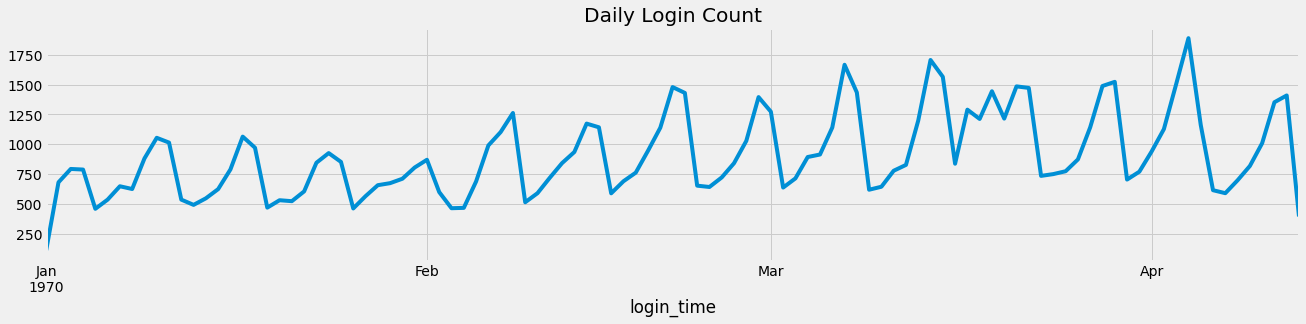

In [966]:
login_daily['count'].plot(figsize=(20,4))
plt.title('Daily Login Count')
plt.show()

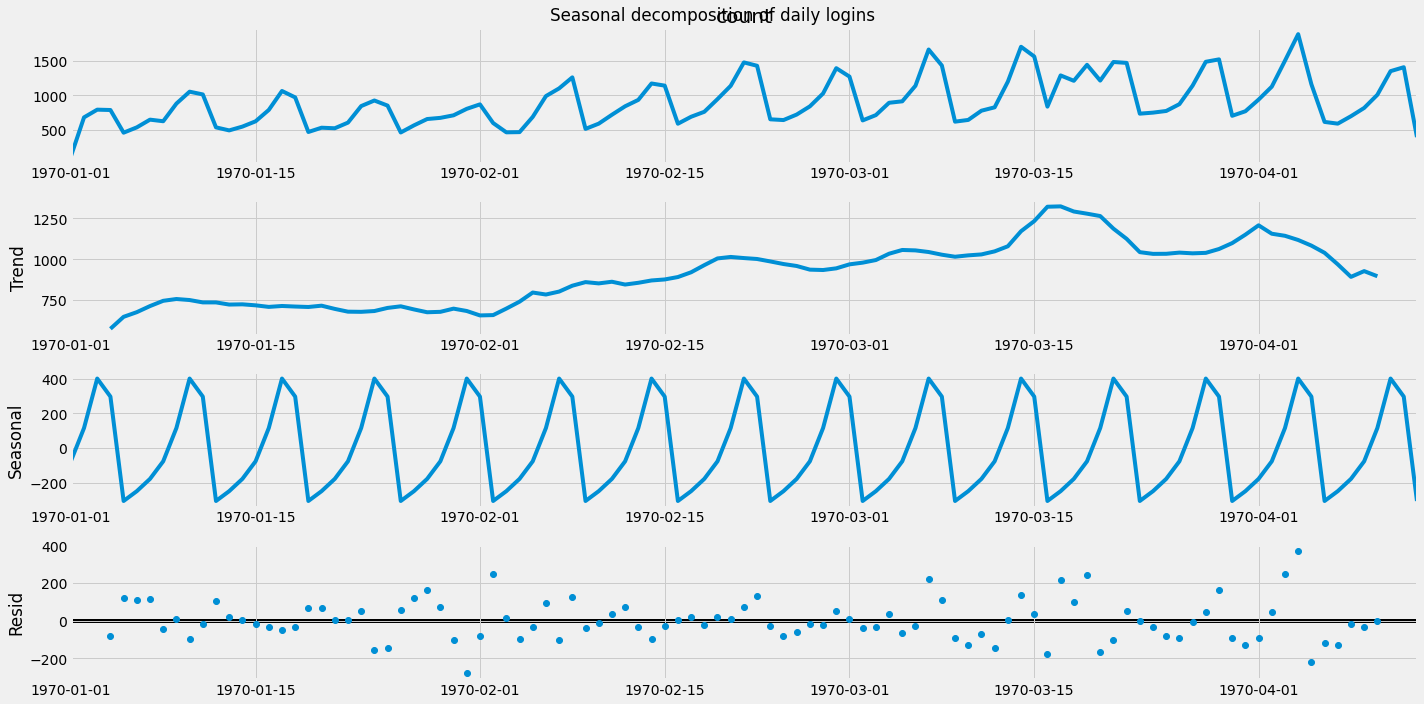

In [967]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
decomposition = seasonal_decompose(login_daily['count'], model='additive', period=7)
fig = decomposition.plot()
plt.suptitle('Seasonal decomposition of daily logins')
matplotlib.rcParams['figure.figsize'] = [8, 5]

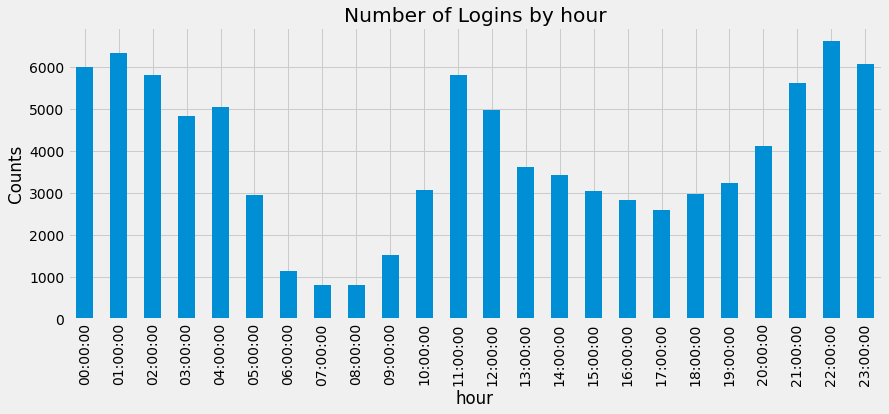

In [970]:
plt.figure(figsize=(13,5))
login_hourly.groupby('hour')['count'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Number of Logins by hour')
plt.ylabel('Counts')
plt.show()

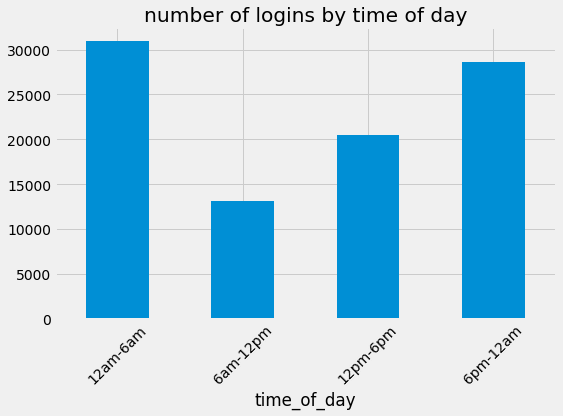

In [971]:
login_hourly['time_of_day'] = pd.cut(np.array(login_hourly.index.hour), bins=4, labels=['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am'])
login_hourly.groupby('time_of_day')['count'].sum().plot(kind='bar')
plt.xticks(rotation=45)

plt.title('number of logins by time of day')
plt.show()

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.  

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

        a. how you will implement the experiment
        b. what statistical test(s) you will conduct to verify the significance of the observation
        c. how you would interpret the reslts and provde recommendations to the city operations team along with any caveats.

- Testing whether two time frames of equal length with and without toll reimbursement costs increases toll-bridge crossings by driver partners between Metropolis and Gotham.
- Metric: Toll bridge crossing counts by driver partners over set time periods (e.g. day, night, weekends, weekdays)
- Null Hypothesis: Toll reimbursement incentives will not increase the average number of toll crossings over weekends. 

a. Experiement implementation: Collect bridge crossing datetimes for driver partners over the span of a year (ideally, but can be shorter. Need to be able to compare seasonal changes as well as have enough data to ensure statistical significance). Do the same thing the next year with the incentive. Downsample the toll-crossing times for the two years to 5 minute intervals (time increment depends on average traffic across bridge), and examine the distribution of the logins 

b. A z-test will be used to test the null hypothesis: i.e. assuming that the distributions of average weekend toll-crossings between the two different years are identical. A p value less than 5% indicates that there is a statistically significant difference between the two distributions.  

c. The hypothesis assumes that travel between the two cities will be best measured during the weekend as activity levels are equal during these times, and that the reversed circadium rhythms between the two cities means travel between them during the day/night is limited. The reason for doing it for a year is to capture any seasonal changes that may increase travel regardless of the incentive (e.g. weather, holidays, etc.) By having the same events occuring over two years, I have more confidence that changes between the two samples will be due to the incentives. Should the results show that the two periods different to a statistically significant degree, the next step would be to look at any revenue increases that happened during the experiment, see if the differnece is statiscally significant, and do do a cost-benefit analysis between the lost profits from the tolls, and any statistically relevent revenue increases.

# Part 3 - Work 

Data Description

    ● city: city this user signed up in
    ● phone: primary device for this user
    ● signup_date: date of account registration; in the form ‘YYYYMMDD’
    ● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
    ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    ● avg_rating_by_driver: the rider’s average rating over all of their trips
    ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    ● surge_pct: the percent of trips taken with surge multiplier > 1
    ● avg_surge: The average surge multiplier over all of this user’s trips
    ● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
    ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
    ● weekday_pct: the percent of the user’s trips occurring during a weekday

# EDA

In [978]:
matplotlib.rcParams['figure.figsize'] = [8, 5]

In [979]:
user_signups = pd.read_json('ultimate_data_challenge.json')

In [980]:
user_signups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [981]:
user_signups.duplicated().sum()

8

In [982]:
user_signups.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

There are minor duplicates that I'll keep. There are a large number of missing values from the avg_rating_of_driver column (17% of the series is missing). I will fill in the missing values with the mean of the data and deal with the missing phones later 

In [983]:
len(user_signups.dropna()) / len(user_signups)

0.8289

In [984]:
user_signups['avg_rating_of_driver'].fillna(value=user_signups['avg_rating_of_driver'].mean(), inplace=True)
#user_signups['avg_rating_by_driver'].fillna(value=user_signups['avg_rating_by_driver'].mean(), inplace=True)

In [985]:
user_signups.isna().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver      201
dtype: int64

# Get active users

In [986]:
# find users that are still active if their last trip was at least 30 days ago

user_signups['signup_date'] = pd.to_datetime(user_signups['signup_date'], errors='raise', infer_datetime_format=True)
user_signups['last_trip_date'] = pd.to_datetime(user_signups['last_trip_date'], errors='raise', infer_datetime_format=True)
latest_pull_date = user_signups['last_trip_date'].max()
user_signups['days_since_last_trip'] = latest_pull_date - user_signups['last_trip_date'] 

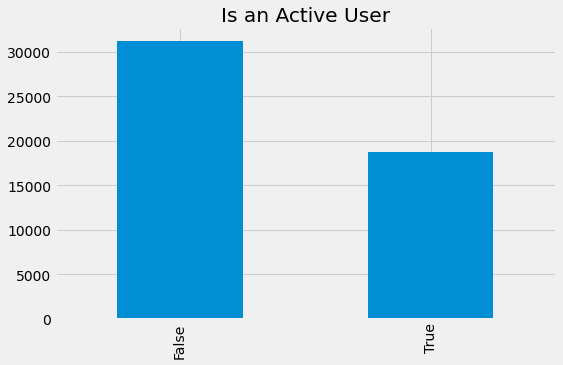

In [987]:
# find percentage of users that signed up in january that are still active

from datetime import timedelta
delta = timedelta(days=30)

# Create Target Variable
user_signups['is_active'] = user_signups['days_since_last_trip'].apply(lambda x: True if x <= delta else False)

user_signups['is_active'].value_counts().plot(kind='bar')
plt.title('Is an Active User')
plt.show()

In [809]:
user_signups['is_active'].value_counts().iloc[1] / (user_signups['is_active'].value_counts().iloc[0] + user_signups['is_active'].value_counts().iloc[1])

0.37608

## Model Building

### Additional EDA

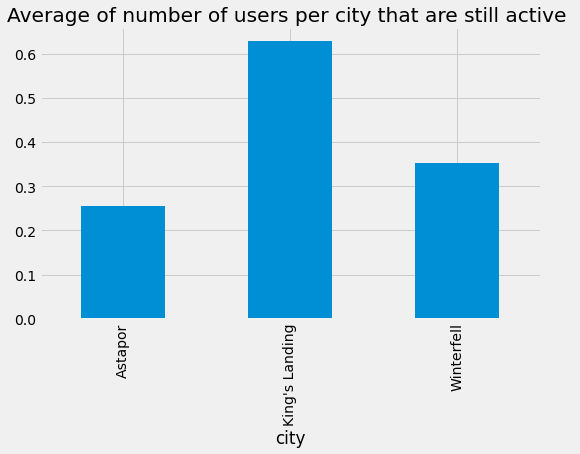

In [810]:
user_signups.groupby('city').mean()['is_active'].plot(kind='bar')
plt.title('Average of number of users per city that are still active ')
plt.show()

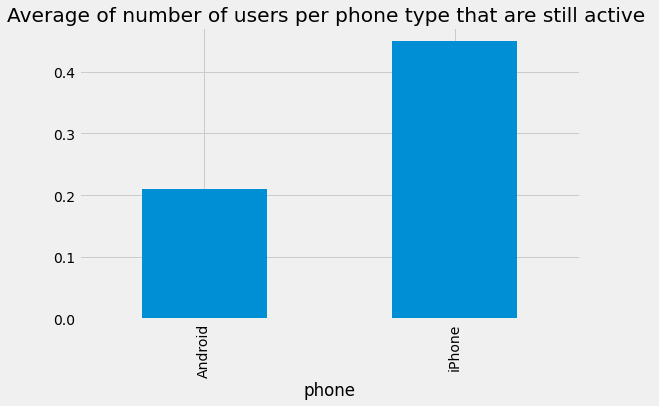

In [811]:
user_signups.groupby('phone').mean()['is_active'].plot(kind='bar')
plt.title('Average of number of users per phone type that are still active ')
plt.show()

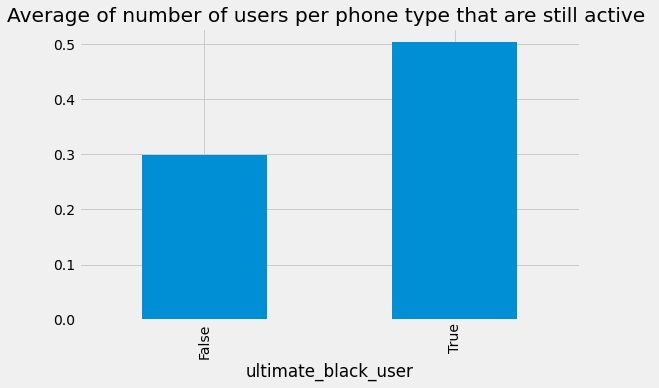

In [812]:
user_signups.groupby('ultimate_black_user').mean()['is_active'].plot(kind='bar')
plt.title('Average of number of users per phone type that are still active ')
plt.show()

In [813]:
user_signups

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,is_active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14 days,True
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57 days,False
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175 days,False
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2 days,True
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,26 days,True
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,157 days,False
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,40 days,False
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,167 days,False


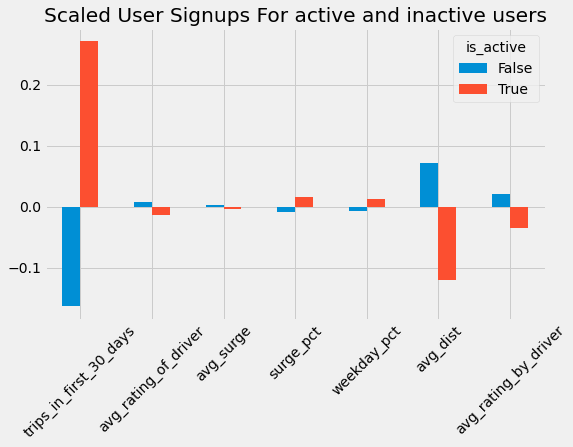

In [814]:
from sklearn.preprocessing import StandardScaler
numeric_features = user_signups.select_dtypes(['int64', 'float64']).columns

user_signups_minmax = pd.DataFrame()
user_signups_minmax[numeric_features] = StandardScaler().fit_transform(user_signups[numeric_features])
user_signups_minmax = pd.concat([user_signups_minmax[numeric_features], user_signups['is_active']], axis=1)
#user_signups.drop('weekday_pct', axis=1).groupby('is_active').mean().T.plot(kind='bar')
user_signups_minmax.groupby('is_active').mean().T.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Scaled User Signups For active and inactive users')
plt.show()

**The average rating of the driver, average surge, average distance traveled, and average rating by driver are all lower for active users. Number of trips in first 30 days, surge percentage, weekday_percentage are higher for active users.**
- incentivize taking trips early
- lower surge rates on weekends and for longer travel

In [815]:
active, inactive = user_signups[user_signups['is_active'] == True], user_signups[user_signups['is_active'] == False]

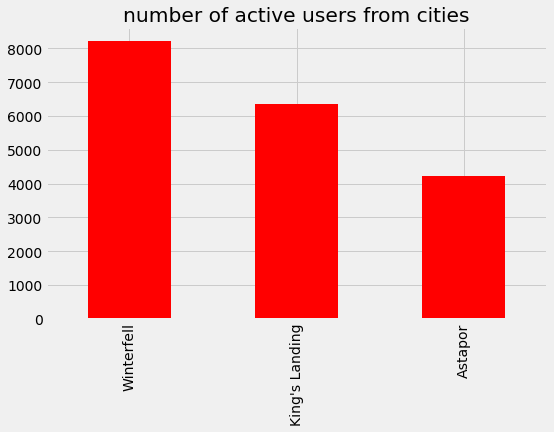

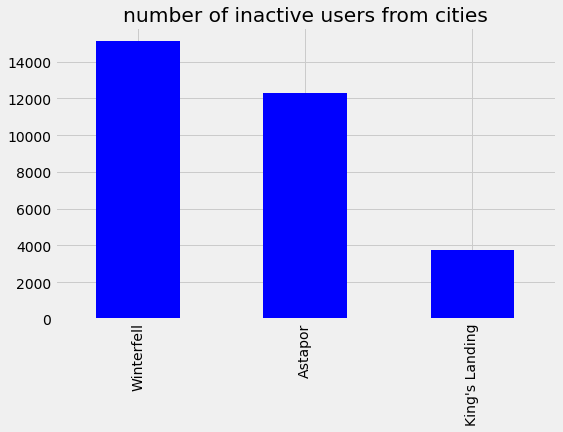

In [816]:
active['city'].value_counts().plot(kind='bar', color='red')
plt.title('number of active users from cities')
plt.show()

inactive['city'].value_counts().plot(kind='bar', color='blue')
plt.title('number of inactive users from cities')
plt.show()

Most of the users from from winterfell, so its imporant to focus on capturing greater rider retention in this city, as well as to focus on Astapor as more riders there are inactive than active (find out why, distance?)

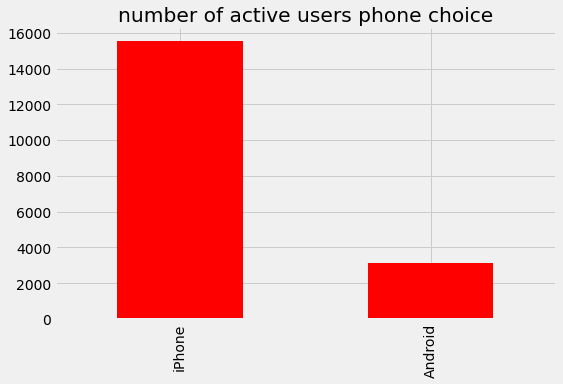

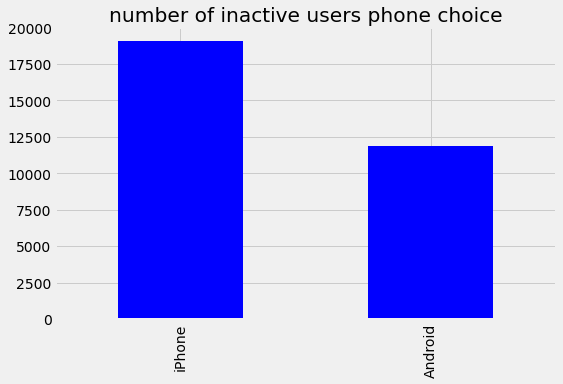

In [817]:
active['phone'].value_counts().plot(kind='bar', color='red')
plt.title('number of active users phone choice')
plt.show()

inactive['phone'].value_counts().plot(kind='bar', color='blue')
plt.title('number of inactive users phone choice')
plt.show()

Focus ads on iphone and increase ads on android (untapped?)

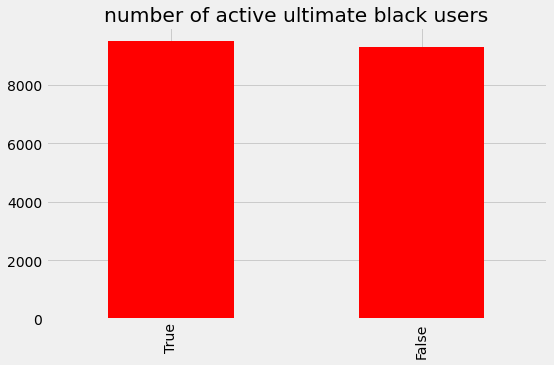

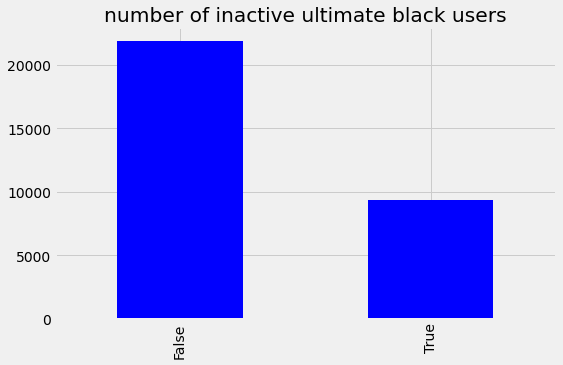

In [818]:
active['ultimate_black_user'].value_counts().plot(kind='bar', color='red')
plt.title('number of active ultimate black users')
plt.show()

inactive['ultimate_black_user'].value_counts().plot(kind='bar', color='blue')
plt.title('number of inactive ultimate black users')
plt.show()

### Number of trips in first 30 days seems to be an important feature for determining rider retention.

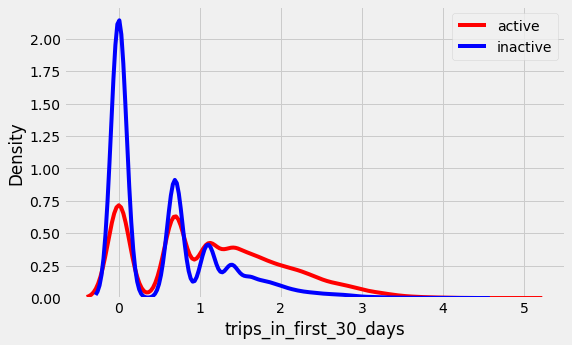

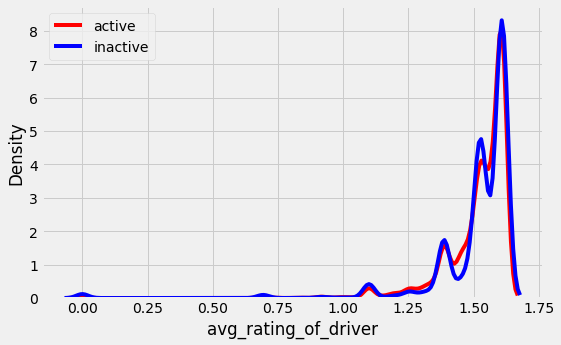

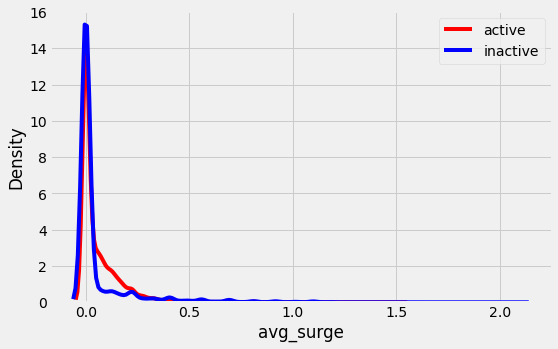

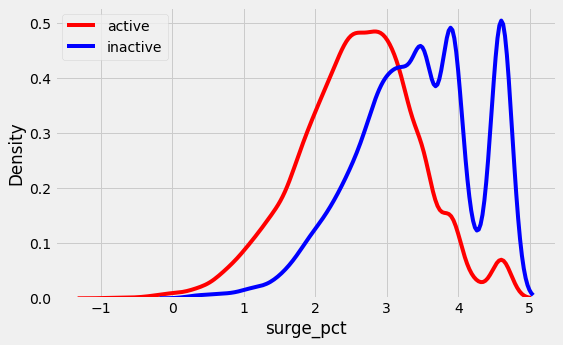

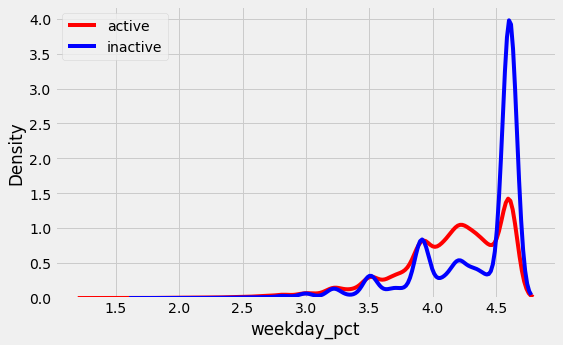

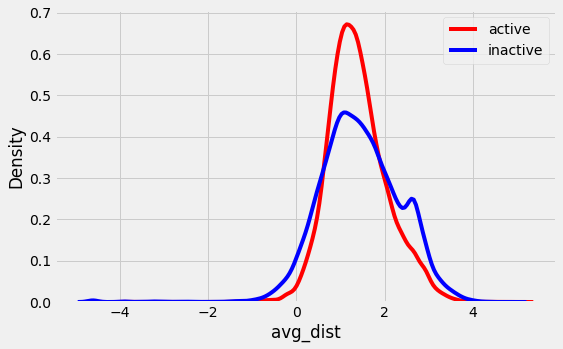

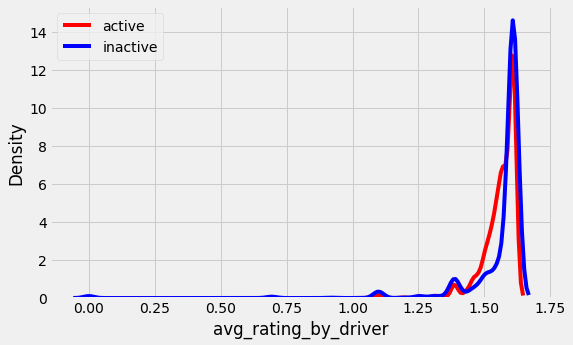

In [819]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
num_feat = pd.concat([user_signups.select_dtypes(['int64', 'float64']), user_signups['is_active']], axis=1)

num_feat[numeric_features] = np.log(num_feat[numeric_features])
active_log, inactive_log = num_feat[num_feat['is_active'] == True], num_feat[num_feat['is_active'] == False]
import seaborn as sns

for feature in numeric_features:
    sns.kdeplot(data=active_log, x=feature, color='red', label='active', log_scale=0)
    sns.kdeplot(data=inactive_log, x=feature, color='blue', label='inactive')
    #plt.xlim(0,10)
    plt.legend()
    plt.show()

Riders that take trips in the first 30 days 

There is a pretty strong distinction between the density plots for surge percentage. Users that are still active have a lower average surge percentage than those that don't. Reducing surge percentages by decreasing the time periods when surges happen or lowering the surge rates should increase rider retention.



In [820]:
user_signups

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,is_active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14 days,True
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57 days,False
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175 days,False
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2 days,True
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,26 days,True
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,157 days,False
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,40 days,False
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,167 days,False


In [821]:

features_removed = ['signup_date',
       'days_since_last_trip', 'is_active', 'last_trip_date']

# Model Building

In [822]:
user_signups_processed.columns 

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'days_since_last_trip', 'is_active', 'phone_Android', 'phone_iPhone',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell'],
      dtype='object')

In [823]:
user_signups_processed

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,is_active,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,14 days,True,0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,57 days,False,1,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,175 days,False,0,1,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,2 days,True,0,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,108 days,False,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,False,100.0,5.63,4.2,26 days,True,0,1,0,1,0
49996,1,2014-01-24,NaN,1.00,2014-01-25,0.0,False,0.0,0.00,4.0,157 days,False,0,1,1,0,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,True,100.0,3.86,5.0,40 days,False,1,0,0,0,1
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,False,100.0,4.58,3.5,167 days,False,0,1,1,0,0


In [824]:
# Separate train/test data

from sklearn.model_selection import train_test_split

#if dummies are needed
user_signups_processed = pd.concat([user_signups.drop(['phone', 'city'], axis=1), pd.get_dummies(user_signups[['phone', 'city']])], axis=1)

# 
X, y = user_signups_processed.dropna().drop(features_removed, axis=1), user_signups_processed.dropna()['is_active'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [825]:
X_train

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
11960,2,4.800000,1.00,0.0,False,91.7,3.14,4.9,0,1,1,0,0
34798,1,4.800000,1.14,14.3,True,14.3,4.35,4.9,0,1,1,0,0
39267,0,4.601559,1.00,0.0,False,0.0,1.25,5.0,0,1,1,0,0
20074,0,5.000000,1.00,0.0,False,100.0,24.57,5.0,0,1,0,0,1
23527,0,5.000000,1.00,0.0,True,66.7,13.90,5.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,0,4.300000,1.00,0.0,True,50.0,5.23,4.8,0,1,0,0,1
40176,1,4.601559,1.00,0.0,False,100.0,8.22,5.0,0,1,0,0,1
46235,1,5.000000,1.00,0.0,False,37.5,2.61,5.0,0,1,0,1,0
32584,1,5.000000,1.00,0.0,False,100.0,47.28,5.0,0,1,1,0,0


In [826]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
reduced = pca.fit_transform(X_train , y_train)

In [827]:
pca.explained_variance_ratio_.sum()

0.9737690585536212

In [828]:
pca.explained_variance_ratio_

array([0.76277698, 0.21099208])

In [829]:

pc_1_components = pd.DataFrame(list(zip(X_train .columns, np.abs(pca.components_[0]))), columns=['feature', 'contribution'])
pc_2_components = pd.DataFrame(list(zip(X_train .columns, np.abs(pca.components_[1]))), columns=['feature', 'contribution'])

In [830]:
pc_1_components.sort_values(by='contribution', ascending=False)

,feature,contribution
5,weekday_pct,0.993585
3,surge_pct,0.111676
6,avg_dist,0.017092
0,trips_in_first_30_days,0.004930
2,avg_surge,0.000945
4,ultimate_black_user,0.000574
11,city_King's Landing,0.000290
7,avg_rating_by_driver,0.000243
10,city_Astapor,0.000215
1,avg_rating_of_driver,0.000137


In [831]:
pc_2_components.sort_values(by='contribution', ascending=False)

,feature,contribution
3,surge_pct,0.993292
5,weekday_pct,0.112092
6,avg_dist,0.026585
2,avg_surge,0.008676
0,trips_in_first_30_days,0.003624
4,ultimate_black_user,0.002492
12,city_Winterfell,0.001817
10,city_Astapor,0.001101
11,city_King's Landing,0.000716
7,avg_rating_by_driver,0.000543


# Surge percentage and weekday percentage are the two most important features, followed by average distance traveled

In [832]:
reduced = pd.DataFrame(reduced, columns=['pc_1', 'pc_2'])
reduced['is_active'] = y_train

<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

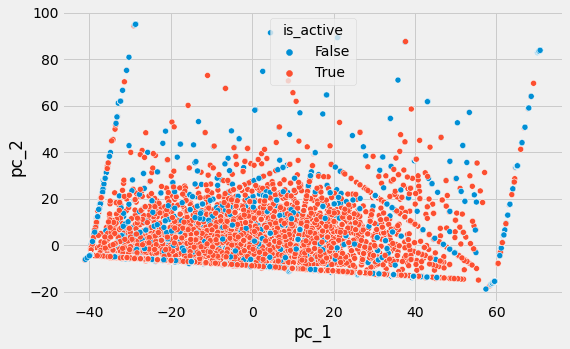

In [833]:
sns.scatterplot(data=reduced, x='pc_1', y='pc_2', hue='is_active')

In [834]:
features_to_try = ['ultimate_black_user']

# pc1 is the city (3 groupings),  pc2 is either phones

In [835]:
val_size = int(.15*len(X_train))
X_val, X_train_new, y_val, y_train_new = X_train[:val_size], X_train[val_size:], y_train[:val_size], y_train[val_size:]

In [836]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lgr_pipeline = make_pipeline(
    StandardScaler(), PCA(n_components='mle'),
    LogisticRegression(random_state=0, n_jobs=-1, class_weight='balanced')
)
lgr_pipeline.fit(X_train_new , y_train_new)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components='mle')),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', n_jobs=-1,
                                    random_state=0))])

In [837]:
lgr_pipeline.score(X_val , y_val)
y_pred = lgr_pipeline.predict(X_val )

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.73      0.75      3704
        True       0.60      0.67      0.63      2271

    accuracy                           0.71      5975
   macro avg       0.69      0.70      0.69      5975
weighted avg       0.71      0.71      0.71      5975

[[2696 1008]
 [ 752 1519]]


In [838]:
cv = cross_validate(lgr_pipeline, X_train , y_train, cv=10, n_jobs=-1, verbose=2, return_train_score=True)

# Baseline score
pd.DataFrame(cv).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.2s finished


fit_time       1.218330
score_time     0.018530
test_score     0.701750
train_score    0.702358
dtype: float64

In [839]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.6983650554983343

In [840]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = make_pipeline(StandardScaler(),
                            RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced'))
rf_pipeline.fit(X_train_new , y_train_new)
rf_pipeline.score(X_val , y_val)

0.7494560669456067

In [841]:
y_pred = rf_pipeline.predict(X_val )
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.81      0.80      3704
        True       0.68      0.65      0.66      2271

    accuracy                           0.75      5975
   macro avg       0.73      0.73      0.73      5975
weighted avg       0.75      0.75      0.75      5975

[[3007  697]
 [ 800 1471]]


In [842]:
roc_auc_score(y_val, y_pred)

0.7297786652629217

In [843]:
cv = cross_validate(rf_pipeline, X_train , y_train, cv=10, n_jobs=-1, verbose=2, return_train_score=True)

# Baseline score
pd.DataFrame(cv).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   48.1s finished


fit_time       13.978934
score_time      0.164667
test_score      0.752504
train_score     0.997133
dtype: float64

It appears that the random forest is overfitting the data

In [844]:
#rf_pipeline.get_params()

In [845]:
from sklearn.model_selection import RandomizedSearchCV

params_grid = {
 'randomforestclassifier__max_depth': [None, 1, 5, 10, 20], 
    'randomforestclassifier__min_samples_split': [2,4,6,10],
    'randomforestclassifier__min_samples_leaf': [1,2,3,5],
 'randomforestclassifier__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3]}

rf_cv = RandomizedSearchCV(rf_pipeline, param_distributions=params_grid, return_train_score=True, scoring='balanced_accuracy', cv=5, n_iter=30, n_jobs=-1, verbose=3)

In [846]:
%%time
rf_cv.fit(X_train_new , y_train_new)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 5.01 s, sys: 336 ms, total: 5.35 s
Wall time: 2min 56s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     n_jobs=-1,
                                                                     random_state=0))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [None,
                                                                              1,
                                                                              5,
                                                                              10,
                                                                              20],
                                        'randomforestclassi

In [847]:
#rf_cv.best_estimator_.get_params()

In [848]:
pd.DataFrame(rf_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'rank_test_score']].sort_values(by='rank_test_score')[:10]

,mean_test_score,mean_train_score,rank_test_score
25,0.767721,0.801330,1
10,0.765135,0.838986,2
28,0.759316,0.762536,3
8,0.758851,0.762528,4
0,0.743067,0.743771,5
26,0.743043,0.743732,6
4,0.743043,0.743732,6
5,0.743043,0.743732,6
16,0.743043,0.743732,6
13,0.743043,0.743732,6


In [849]:
rf_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=3, n_jobs=-1,
                                        random_state=0))])

In [850]:
rf_feat_imp = list(zip(X_val .columns, rf_cv.best_estimator_[1].feature_importances_))

Text(0.5, 1.0, 'Random Forest Feature Importance')

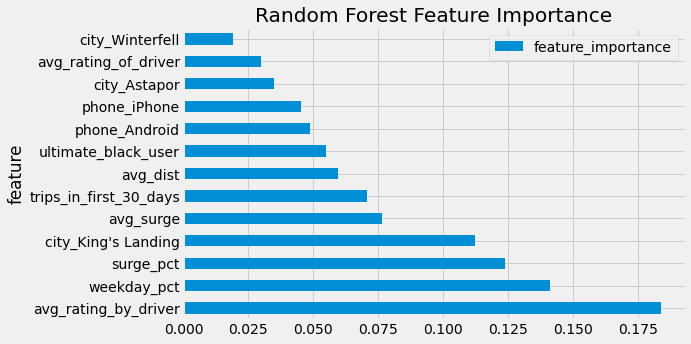

In [851]:
pd.DataFrame(rf_feat_imp, columns=['feature', 'feature_importance']).set_index('feature').sort_values(by='feature_importance', ascending=False).plot(kind='barh')
plt.title('Random Forest Feature Importance')

The average distance traveled for non-active users is higher than that of active users. Given that the model predicts the average distance to be important for the user retention, offering incentives to riders who have further to travel might increase retention rate.

In [852]:
y_pred = rf_cv.best_estimator_.predict(X_val )
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.79      0.81      3704
        True       0.69      0.75      0.72      2271

    accuracy                           0.77      5975
   macro avg       0.76      0.77      0.76      5975
weighted avg       0.78      0.77      0.78      5975

[[2936  768]
 [ 578 1693]]
0.7690715786330224


# GB Classifier

In [853]:
from sklearn.ensemble import GradientBoostingClassifier
gb_pipeline = make_pipeline(StandardScaler(), GradientBoostingClassifier())
gb_pipeline.fit(X_train_new , y_train_new)
gb_pipeline.score(X_val , y_val)

0.7807531380753138

In [854]:
y_pred = gb_pipeline.predict(X_val )
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.86      0.83      3704
        True       0.74      0.66      0.69      2271

    accuracy                           0.78      5975
   macro avg       0.77      0.76      0.76      5975
weighted avg       0.78      0.78      0.78      5975

[[3173  531]
 [ 779 1492]]
0.7568103864768759


In [855]:
cv = cross_validate(gb_pipeline, X_train , y_train, cv=10, n_jobs=-1, verbose=2, return_train_score=True, scoring='balanced_accuracy')

# Baseline score
pd.DataFrame(cv).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   47.8s finished


fit_time       16.628158
score_time      0.055557
test_score      0.760179
train_score     0.764394
dtype: float64

In [856]:
#gb_pipeline.get_params()

In [857]:
params_grid = {

 'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
'gradientboostingclassifier__n_estimators': [10, 100, 500, 1000],
    'gradientboostingclassifier__min_samples_leaf': [1, 40, 200]
}

gb_cv = RandomizedSearchCV(gb_pipeline, param_distributions=params_grid, return_train_score=True, scoring='balanced_accuracy', n_iter=10, n_jobs=-1, verbose=3)

In [858]:
%%time
gb_cv.fit(X_train_new , y_train_new)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 42.9 s, sys: 2.28 s, total: 45.1 s
Wall time: 15min


RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'gradientboostingclassifier__learning_rate': [0.05,
                                                                                      0.1,
                                                                                      0.2],
                                        'gradientboostingclassifier__min_samples_leaf': [1,
                                                                                         40,
                                                                                         200],
                                        'gradientboostingclassifier__n_estimators': [10,
                                          

In [859]:
pd.DataFrame(gb_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'rank_test_score']].sort_values(by='rank_test_score')[:10]

,mean_test_score,mean_train_score,rank_test_score
7,0.766473,0.782154,1
0,0.766284,0.777993,2
5,0.765766,0.784911,3
6,0.765168,0.786470,4
4,0.764546,0.795139,5
3,0.764357,0.794240,6
9,0.763797,0.772931,7
2,0.760111,0.821519,8
1,0.760008,0.764739,9
8,0.627542,0.628805,10


In [860]:
# gb_cv.best_estimator_.get_params()

In [1033]:
y_pred = gb_cv.best_estimator_.predict(X_val )
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.86      0.83      3704
        True       0.74      0.66      0.70      2271

    accuracy                           0.78      5975
   macro avg       0.77      0.76      0.76      5975
weighted avg       0.78      0.78      0.78      5975

[[3172  532]
 [ 774 1497]]
0.757776233911855


In [1034]:
from sklearn.inspection import permutation_importance
r = permutation_importance(gb_pipeline, X_val , y_val,
                           n_repeats=30,
                            random_state=0)

In [1035]:
gb_feat_imp = list(zip(X_val .columns, r['importances_mean']))

Text(0.5, 1.0, 'Gradient Boost Permutation Feature Importance')

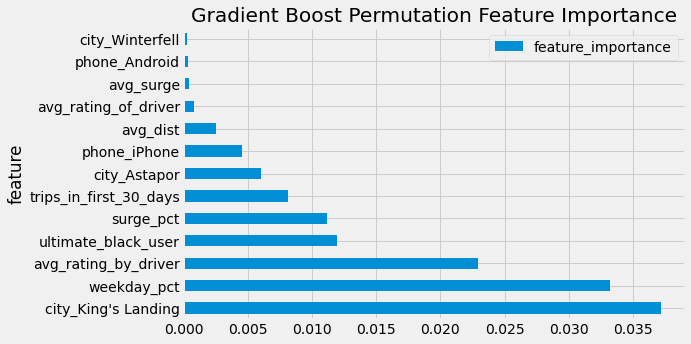

In [1036]:
pd.DataFrame(gb_feat_imp, columns=['feature', 'feature_importance']).set_index('feature').sort_values(by='feature_importance', ascending=False).plot(kind='barh')
plt.title('Gradient Boost Permutation Feature Importance')

In [1037]:
model = gb_cv.best_estimator_
y_pred = model.predict(X_test)

In [1038]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.87      0.84      6206
        True       0.76      0.67      0.71      3754

    accuracy                           0.79      9960
   macro avg       0.78      0.77      0.77      9960
weighted avg       0.79      0.79      0.79      9960



In [1039]:
X_test[:10]

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
15573,6,3.900000,1.25,25.0,True,37.5,10.06,5.0,1,0,1,0,0
20445,6,4.900000,1.06,8.6,True,71.4,3.08,4.8,0,1,0,1,0
34068,0,4.601559,1.00,0.0,False,100.0,15.47,5.0,0,1,0,0,1
17098,1,5.000000,1.00,0.0,False,100.0,1.28,5.0,0,1,0,0,1
9243,2,5.000000,1.00,0.0,False,100.0,1.88,5.0,0,1,0,0,1
41788,1,5.000000,1.00,0.0,False,100.0,2.70,5.0,0,1,1,0,0
23217,1,5.000000,1.00,0.0,True,100.0,17.40,5.0,1,0,0,0,1
27635,1,4.000000,1.00,0.0,False,100.0,4.27,5.0,0,1,0,1,0
30458,4,4.700000,1.00,0.0,False,50.0,9.79,5.0,1,0,1,0,0
22781,0,4.600000,1.00,0.0,False,57.1,5.16,4.7,0,1,0,0,1


In [1040]:
model.predict_proba(X_test.iloc[0].values.reshape(1,-1))

X does not have valid feature names, but StandardScaler was fitted with feature names


array([[0.86189848, 0.13810152]])

# Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

# Answers for Part 3
**Answer to Problem 1**
1. 37.61% of the users that signup up in january are still active at the 6-month pull. This was determined by finding users that had their last trip at least 30 days since the pull. See figure for plot. There are minor duplicates that I'll keep and a large number of missing values from the avg_rating_of_driver column (17% of the series is missing). I will fill in the missing values with the mean of the data and deal with the missing phones and avg_rating_by_driver by dropping them.

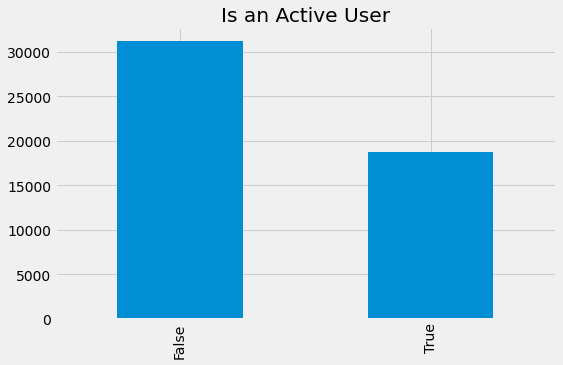

In [1064]:
user_signups['is_active'].value_counts().plot(kind='bar')
plt.title('Is an Active User')
plt.show()

## **Answer to Problem 2**
2. I elected to use a gradient boosting classifier for the final model. I selected this model because it has a higher precision score for the active user class, which will be beneficial in determining which features are most predictive for user retention (see results below). Other models that I tried were KNeighborsClassifiers, Random Forest Classifiers, Logistic Regressors, and Multinomial Naive Bayes.

A small performance boost was obtained with hyperparameter tuning, which can also show that the model has some slight overfitting that can probably be removed with a bit more pruning. 20% of the data was set aside for testing and the model was evaluated using a holdout set from the remaining training data which was evaluated with 5-fold cross-validation to assess model performance. For this reason I am quite comfortable with my model's predictive ability.

In [1065]:
# Can only run after notebook is run! 

y_pred = gb_cv.best_estimator_.predict(X_val )
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.86      0.83      3704
        True       0.74      0.66      0.70      2271

    accuracy                           0.78      5975
   macro avg       0.77      0.76      0.76      5975
weighted avg       0.78      0.78      0.78      5975

[[3172  532]
 [ 774 1497]]
0.757776233911855


In [1066]:
# Hyperparameter Tuning

pd.DataFrame(gb_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'rank_test_score']].sort_values(by='rank_test_score')[:10]

,mean_test_score,mean_train_score,rank_test_score
7,0.766473,0.782154,1
0,0.766284,0.777993,2
5,0.765766,0.784911,3
6,0.765168,0.786470,4
4,0.764546,0.795139,5
3,0.764357,0.794240,6
9,0.763797,0.772931,7
2,0.760111,0.821519,8
1,0.760008,0.764739,9
8,0.627542,0.628805,10


## **Answer to Problem 3**
3. The feature importance of the model was evaluated using permutation feature importance. Coming from King's Landing has the greatest impact on the model's predictions, but further tuning and analysis needs to be done to assess how true that is as this based off the model's performance. However now that the model has been developed it can be used to see what things can be done to improve customer retention. For example the model correctly predicts the user at index location 0 for the test set to not be active at 6 months with 86% certainty. Changing specific feature elements for that user and repredicting the result can show what can be done to retain users. This can be seen below where the user has the same features as before, but has relocated from Astapor to King's Landing. This one change moves the prediction to being an active user with 61% certainty. (Conversly, something that apparently doesn't matter is the average rating of the driver, as the same user that is predicted to leave with 86% certainty has an average rating of driver to be 3.9 when the average is 4.5. Setting it to 5.0 and re-predicting makes it worse! But, setting it to 5 if the user has moved to King's Landing further increases the prediction. What is clear is that more user retention for those in king's landing and that company resources need to be offering incentives to other cities.

**The average rating of the driver, average surge, average distance traveled, and average rating by driver are all lower for active users. Number of trips in first 30 days, surge percentage, weekday_percentage are higher for active users.**
- incentivize taking trips early
- lower surge rates on weekends and for longer travel

Text(0.5, 1.0, 'Gradient Boost Permutation Feature Importance')

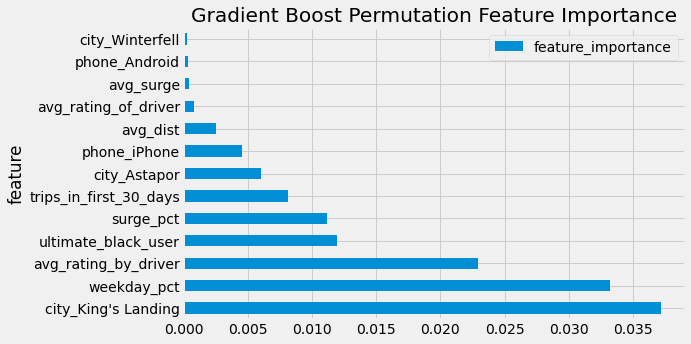

In [1067]:
pd.DataFrame(gb_feat_imp, columns=['feature', 'feature_importance']).set_index('feature').sort_values(by='feature_importance', ascending=False).plot(kind='barh')
plt.title('Gradient Boost Permutation Feature Importance')

In [1068]:
model = gb_cv.best_estimator_
model.predict_proba(X_test.iloc[0].values.reshape(1,-1))

X does not have valid feature names, but StandardScaler was fitted with feature names


array([[0.86189848, 0.13810152]])

In [1069]:
X_test['avg_rating_of_driver'].mean()

4.595011090256135

In [1070]:
user = X_test.iloc[0]

In [1071]:
user

trips_in_first_30_days        6
avg_rating_of_driver        3.9
avg_surge                  1.25
surge_pct                  25.0
ultimate_black_user        True
weekday_pct                37.5
avg_dist                  10.06
avg_rating_by_driver        5.0
phone_Android                 1
phone_iPhone                  0
city_Astapor                  1
city_King's Landing           0
city_Winterfell               0
Name: 15573, dtype: object

In [1056]:
user['avg_rating_of_driver'] = 5.0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1057]:
user

trips_in_first_30_days        6
avg_rating_of_driver        5.0
avg_surge                  1.25
surge_pct                  25.0
ultimate_black_user        True
weekday_pct                37.5
avg_dist                  10.06
avg_rating_by_driver        5.0
phone_Android                 1
phone_iPhone                  0
city_Astapor                  1
city_King's Landing           0
city_Winterfell               0
Name: 15573, dtype: object

In [1058]:
model.predict_proba(user.values.reshape(1, -1))

X does not have valid feature names, but StandardScaler was fitted with feature names


array([[0.88671494, 0.11328506]])

In [1061]:
user["city_King's Landing"] = 1
user['city_Astapor'] = 0
user['avg_rating_of_driver'] = 3.9


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1062]:
model.predict_proba(user.values.reshape(1, -1))

X does not have valid feature names, but StandardScaler was fitted with feature names


array([[0.3867865, 0.6132135]])

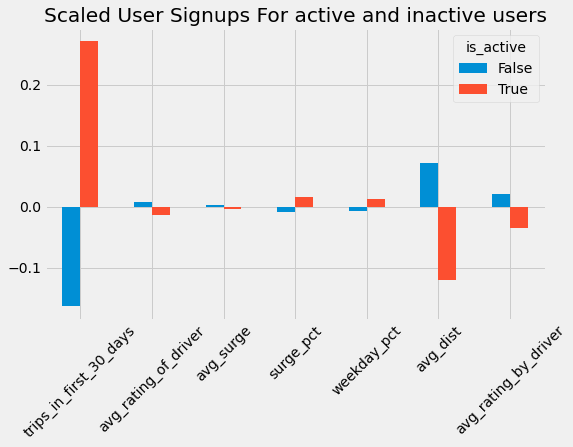

In [1063]:
user_signups_minmax = pd.DataFrame()
user_signups_minmax[numeric_features] = StandardScaler().fit_transform(user_signups[numeric_features])
user_signups_minmax = pd.concat([user_signups_minmax[numeric_features], user_signups['is_active']], axis=1)
#user_signups.drop('weekday_pct', axis=1).groupby('is_active').mean().T.plot(kind='bar')
user_signups_minmax.groupby('is_active').mean().T.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Scaled User Signups For active and inactive users')
plt.show()